# Blatt 6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Laden und in Zeitreihe umwandeln (Aufgabe 1a)
file_path = 'herford_weather.csv'
df = pd.read_csv(file_path)
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')
df.index = df.index

temp_col = 'temperature_2m (°C)'
temp_label = 'Temperatur 2m (°C)'

print('Index-Datentyp:', df.index.dtype)
df.iloc[:5, :5]

Index-Datentyp: datetime64[ns]


,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa)
time,,,,,
1996-01-01 00:00:00,-2.3,80,-5.3,-7.2,1003.4
1996-01-01 01:00:00,-2.1,80,-5.2,-7.0,1003.8
1996-01-01 02:00:00,-2.0,79,-5.2,-6.9,1003.9
1996-01-01 03:00:00,-2.1,79,-5.3,-7.0,1004.0
1996-01-01 04:00:00,-2.2,78,-5.5,-7.1,1004.5


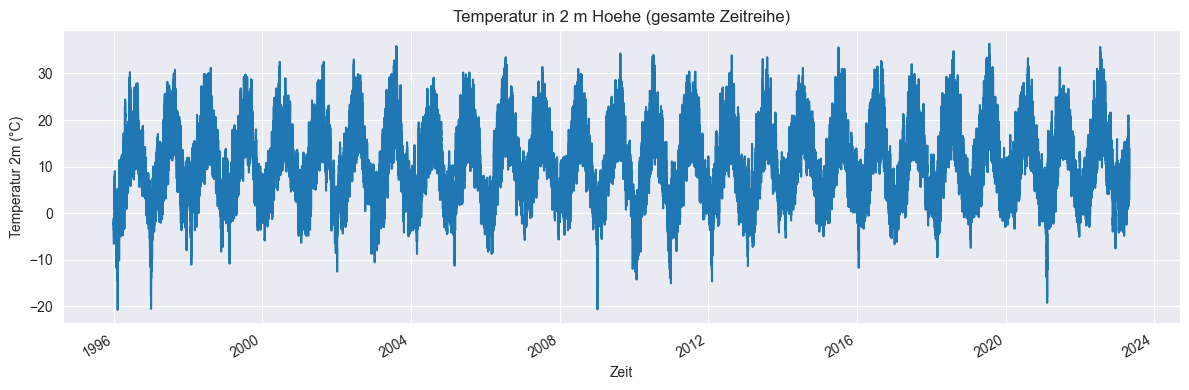

In [8]:
# Linienplot der kompletten Zeitreihe (Aufgabe 1a)
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df.index, df[temp_col], color='tab:blue')
ax.set_title('Temperatur in 2 m Hoehe (gesamte Zeitreihe)')
ax.set_xlabel('Zeit')
ax.set_ylabel(temp_label)
fig.autofmt_xdate()
plt.tight_layout()

## Aufgabe 1b

In [10]:
df_2022 = df.loc['2022']
daily_mean_2022 = df_2022[temp_col].resample('D').mean()
daily_mean_2022 = daily_mean_2022.to_frame(name=temp_label)

daily_mean_2022.head()

,Temperatur 2m (°C)
time,
2022-01-01,11.295833
2022-01-02,11.058333
2022-01-03,8.708333
2022-01-04,6.445833
2022-01-05,2.695833


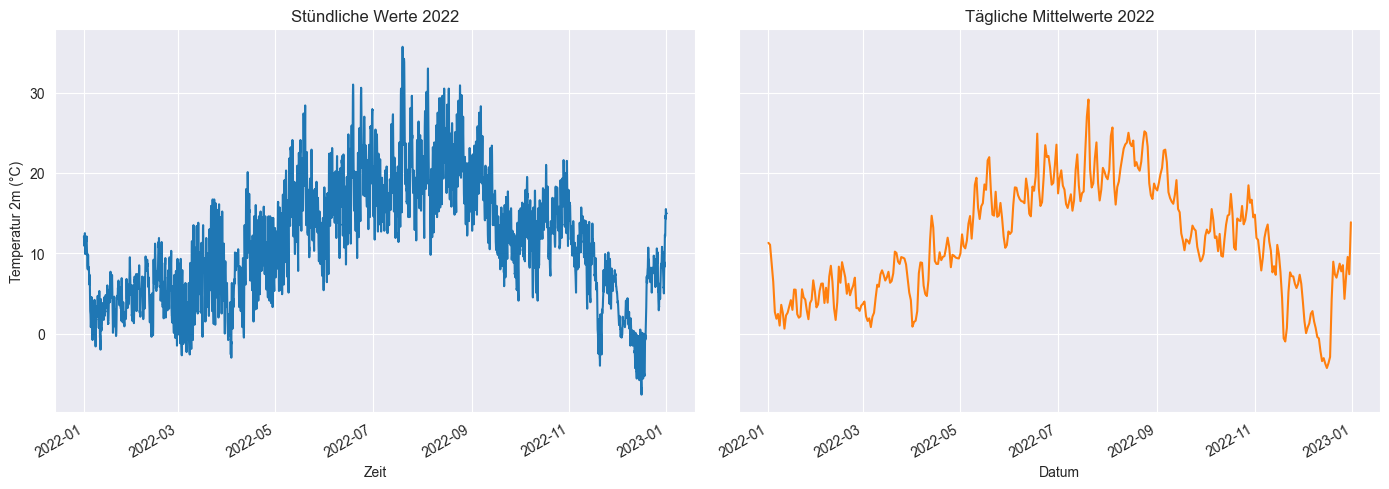

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

axes[0].plot(df_2022.index, df_2022[temp_col], color='tab:blue')
axes[0].set_title('Stündliche Werte 2022')
axes[0].set_xlabel('Zeit')
axes[0].set_ylabel(temp_label)

axes[1].plot(daily_mean_2022.index, daily_mean_2022[temp_label], color='tab:orange')
axes[1].set_title('Tägliche Mittelwerte 2022')
axes[1].set_xlabel('Datum')

fig.autofmt_xdate()
plt.tight_layout()

## Aufgabe 2

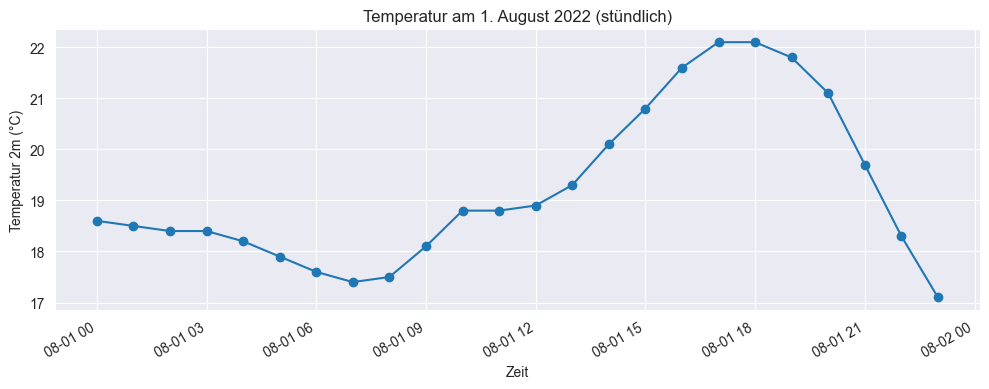

In [13]:
# a) Linienplot fuer den 1. August 2022
aug1_temp = df.loc['2022-08-01', temp_col]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(aug1_temp.index, aug1_temp.values, marker='o')
ax.set_title('Temperatur am 1. August 2022 (stündlich)')
ax.set_xlabel('Zeit')
ax.set_ylabel(temp_label)
fig.autofmt_xdate()
plt.tight_layout()

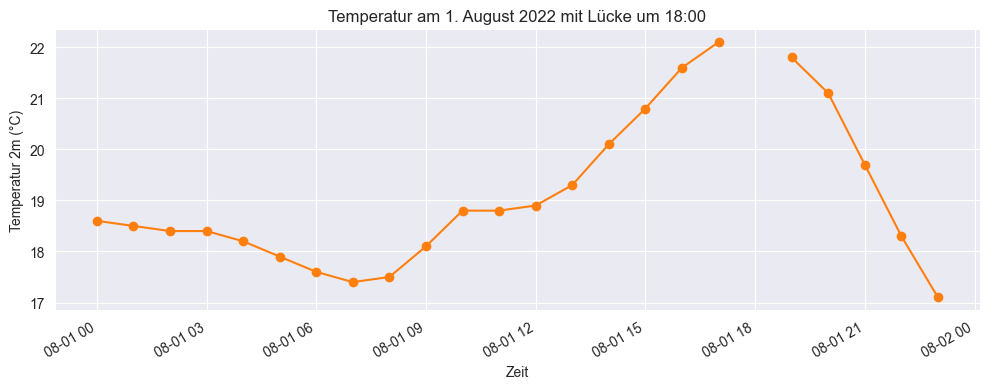

In [15]:
aug1_missing = aug1_temp.copy()
missing_ts = pd.Timestamp('2022-08-01 18:00:00')
if missing_ts in aug1_missing.index:
    aug1_missing.loc[missing_ts] = np.nan

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(aug1_missing.index, aug1_missing, marker='o', color='tab:orange')
ax.set_title('Temperatur am 1. August 2022 mit Lücke um 18:00')
ax.set_xlabel('Zeit')
ax.set_ylabel(temp_label)
fig.autofmt_xdate()
plt.tight_layout()

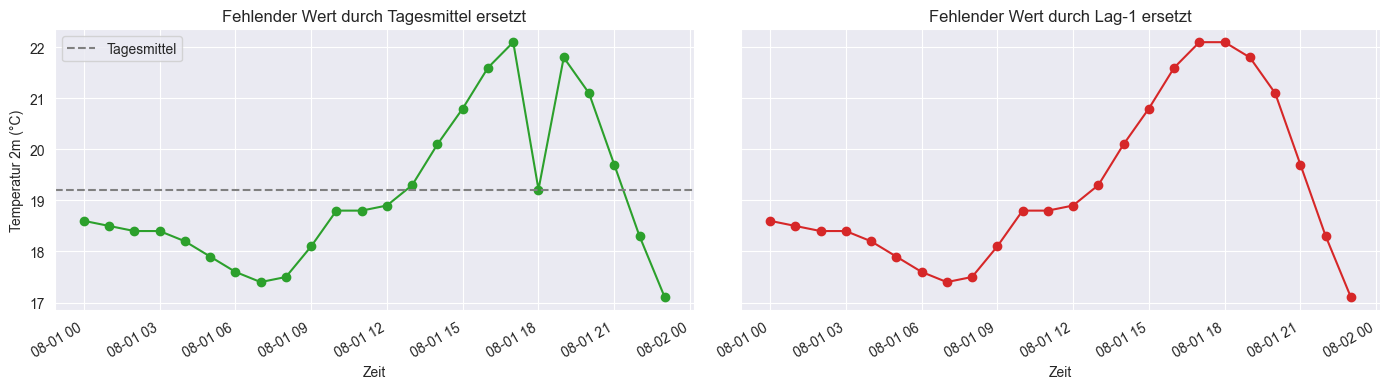

In [17]:
mean_aug1 = aug1_temp.mean()
aug1_mean_filled = aug1_missing.fillna(mean_aug1)
aug1_lag1_filled = aug1_missing.ffill().fillna(mean_aug1)

fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

axes[0].plot(aug1_mean_filled.index, aug1_mean_filled, marker='o', color='tab:green')
axes[0].axhline(mean_aug1, color='gray', linestyle='--', label='Tagesmittel')
axes[0].set_title('Fehlender Wert durch Tagesmittel ersetzt')
axes[0].set_xlabel('Zeit')
axes[0].set_ylabel(temp_label)
axes[0].legend()

axes[1].plot(aug1_lag1_filled.index, aug1_lag1_filled, marker='o', color='tab:red')
axes[1].set_title('Fehlender Wert durch Lag-1 ersetzt')
axes[1].set_xlabel('Zeit')

fig.autofmt_xdate()
plt.tight_layout()

## Aufgabe 3 – Glaettung durch gleitende Mittelwerte

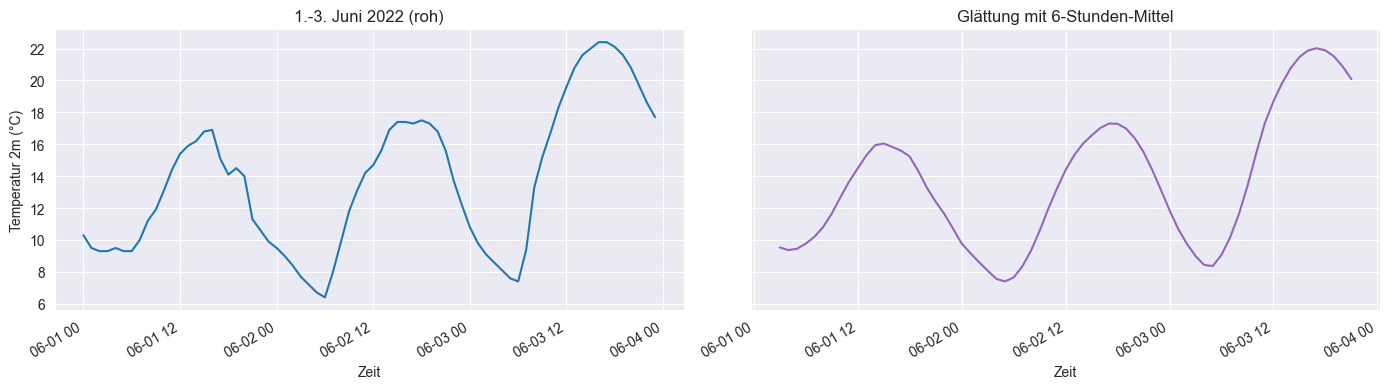

In [18]:
june_slice = df.loc['2022-06-01':'2022-06-03', temp_col]
rolling_window = 6
june_smoothed = june_slice.rolling(window=rolling_window, center=True).mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

axes[0].plot(june_slice.index, june_slice, color='tab:blue')
axes[0].set_title('1.-3. Juni 2022 (roh)')
axes[0].set_xlabel('Zeit')
axes[0].set_ylabel(temp_label)

axes[1].plot(june_smoothed.index, june_smoothed, color='tab:purple')
axes[1].set_title(f'Glättung mit {rolling_window}-Stunden-Mittel')
axes[1].set_xlabel('Zeit')

fig.autofmt_xdate()
plt.tight_layout()